## One class covariate shift



### The dataset is consisting of 1000 data-points, the non-stationary shift occurs in the middle of the data stream at 501 data-point, by shifting the mean of second class from $\mathcal{N}(x: 2.5, 2)$ to $\mathcal{N}(x: 6.5, 2)$, where $\mathcal{N}(x: \mu, \sigma)$ denotes the normal distribution with mean and standard deviation respectively. 

No handles with labels found to put in legend.


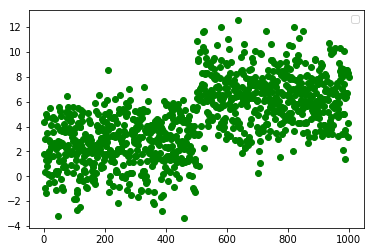

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns
import pandas as pd
import random 


## Training
Tr_Mu1 = 2.5
Tr_std1= 2
Tr_d1 = np.random.normal(Tr_Mu1, Tr_std1, 500)

Tr_Mu2 = 6.5
Tr_std2= 2
Tr_d2 = np.random.normal(Tr_Mu2, Tr_std2, 500)

Tr_X_array=np.concatenate((Tr_d1,Tr_d2), axis=0)
Tr_X=pd.DataFrame(Tr_X_array)
no_of_pnts=np.arange(1, 1001, dtype=np.float)


# PLOT
plt.scatter(no_of_pnts,Tr_X, color='g')
plt.legend()
plt.show()


### Create a toy dataset set with two classes (e.g. $1$ and $2$). Choose the number of observations by yoursleves (e.g. $n=200$) and fix the number of columns to 1. The mean of class 1 and class 2 changed/shifted at the middle of the data stream (i.e. after generating $100^{th}$) observation. 

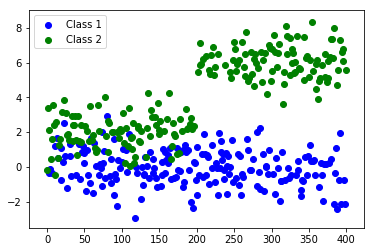

In [4]:
#================================================
## Data Before Shift
#================================================

Tr_Mu1 = 0 # mean of class 1
Tr_std1= 1 # standard deviation of class 1
Tr_d1 = np.random.normal(Tr_Mu1, Tr_std1, 100) # Generate data (covariates or input) for class 1
Tr_lbl_c1=np.ones(100) # Generate Labels for class 1

Tr_Mu2 = 2 # mean of class 2
Tr_std2= 1 # standard deviation of class 2
Tr_d2 = np.random.normal(Tr_Mu2, Tr_std2, 100) # Generate data (covariates or input) for class 2
Tr_lbl_c2=np.ones(100)+1 # Generate Labels for class 2

Tr_X_array=np.concatenate((Tr_d1,Tr_d2), axis=0) # concatenate covariates of class 1 and class 2
Tr_Y_array=np.concatenate((Tr_lbl_c1,Tr_lbl_c2), axis=0) # concatenate labels of class 1 and class 2

Tr_indx=np.random.permutation(len(Tr_X_array)) # generate the indexes with permutation, so class 1 and class 2 data get mixed

tr_Y=[];
for x in range(0, 200):  # for loop to assign labels based on mixed indexes
    if Tr_indx[x] <= 99:
        t = 1
        tr_Y.append(t)
    else:
        t = 2
        tr_Y.append(t)      
  
Tr_X_rand=Tr_X_array[Tr_indx] # create an array that contains randomised data with mixture of class 1 and class 2 based on indexes
df_rand=pd.DataFrame({"x": Tr_X_rand, "y": tr_Y}) # put them inside a data frame

#================================================
## Data After Shift
#================================================

Ts_Mu1 = 0 # mean of class 1
Ts_std1= 1 # standard deviation of class 1
Ts_d1 = np.random.normal(Ts_Mu1, Ts_std1, 100) # Generate data (covariates or input) for class 1
Ts_lbl_c1=np.ones(100) # Generate Labels for class 1

Ts_Mu2 = 6 # mean of class 2
Ts_std2= 1 # standard deviation of class 2
Ts_d2 = np.random.normal(Ts_Mu2, Ts_std2, 100) # Generate data (covariates or input) for class 2
Ts_lbl_c2=np.ones(100)+1 # Generate Labels for class 2

Ts_X_array=np.concatenate((Ts_d1,Ts_d2), axis=0) # concatenate covariates of class 1 and class 2
Ts_Y_array=np.concatenate((Ts_lbl_c1,Ts_lbl_c2), axis=0) # concatenate labels of class 1 and class 2

Ts_indx=np.random.permutation(len(Ts_X_array)) # generate the indexes with permutation, so class 1 and class 2 data get mixed

ts_Y=[];
for x in range(0, 200):  # for loop to assign labels based on mixed indexes
    if Ts_indx[x] <= 99:
        t = 1
        ts_Y.append(t)
    else:
        t = 2
        ts_Y.append(t)      
  
Ts_X_rand=Ts_X_array[Ts_indx] # create an array that contains randomised data with mixture of class 1 and class 2 based on indexes
Ts_df_rand=pd.DataFrame({"x": Ts_X_rand, "y": ts_Y}) # put them inside a data frame


## Merge Two Data frame before and after shift
Data_all=[df_rand,Ts_df_rand]
df_main=pd.concat(Data_all, ignore_index=True)

df_main["indxx"]=df_main.index # create an additional column for index, which can be used for plotting a figure
df_Class1=df_main[df_main.y==1] # create a dataframe which has class 1 inputs and labels
df_Class2=df_main[df_main.y==2] # create a dataframe which has class 2 inputs and labels

# plot
plt.scatter(df_Class1.indxx, df_Class1.x, label="Class 1", color='b') # plot class 1 data
plt.scatter(df_Class2.indxx, df_Class2.x, label="Class 2", color='g') # plot class 2 data
plt.legend()
plt.show()


### Considering the above scenario, change the mean and standard deviation of both the classes to visualize the effect. 